In [110]:
# Importamos las librerías necesarias para la visualización
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [111]:
# Cargamos el dataset limpio
df=pd.read_csv('../data/dataset_limpio.csv')

# Mostramos algunas filas para comprobar que se ha cargado bien
df.head(3)

,company_name,car_name,engine_type,engine_cc,horse_power,top_speed,acceleration_0_100,price,fuel_type,seats,torque_nm
0,ferrari,sf90_stradale,v8,3990.0,963.0,340.0,2.5,1100000.0,hybrid,2.0,800.0
1,rolls_royce,phantom,v12,6749.0,563.0,250.0,5.3,460000.0,petrol,5.0,900.0
2,ford,ka+,others,1200.0,70.0,165.0,10.5,12000.0,petrol,5.0,NaN


`Configuración inicial para que todas las gráficas salgan más grandes, más nítidas y más bonitas`

In [112]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [113]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

### 1.Introducción

En esta sección analizamos el dataset mediante diferentes gráficas con el objetivo de entender mejor cómo se comportan los datos. A través de histogramas, countplots, scatterplots y otros gráficos podremos observar distribuciones, comparar marcas, identificar patrones, etc.

Estas visualizaciones nos permiten interpretar la información de forma más clara.

### 2.Exploración gráfica de los datos

#### ¿Qué marcas aparecen más en el dataset?

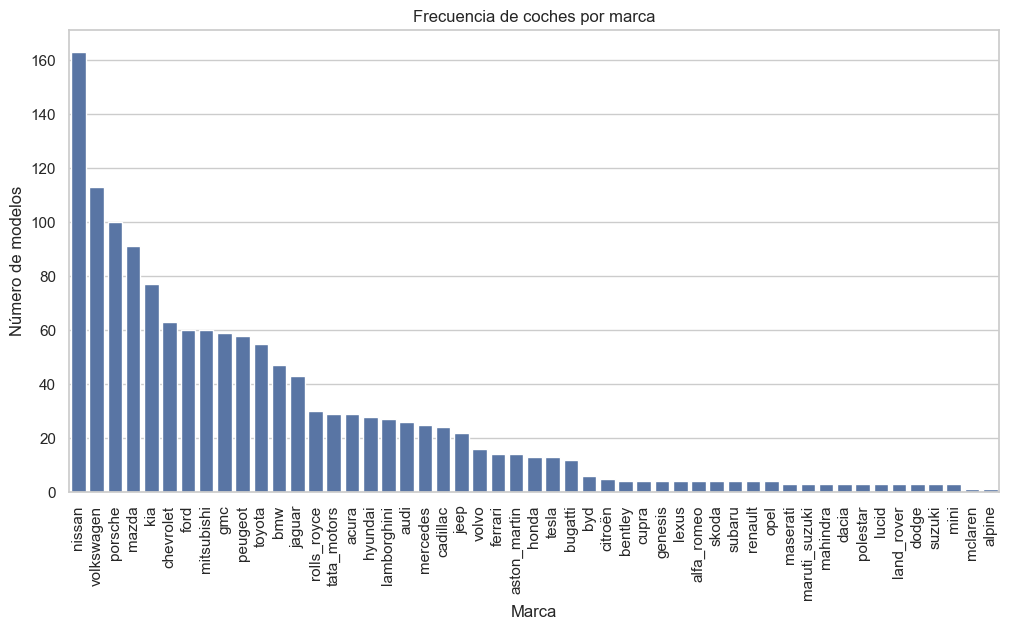

In [ ]:
ordenar = df["company_name"].value_counts().index

sns.countplot( data=df, x="company_name", order=ordenar)
plt.title("Frecuencia de coches por marca")
plt.xlabel("Marca")
plt.ylabel("Número de modelos")
plt.xticks(rotation=90)
plt.show()

`Conclusiones`

- Nissan es la marca más presente en el dataset:

    - Tiene más de 160 modelos registrados.
    - Esto indica que Nissan tiene una gama muy amplia.


- Volkswagen, Peugeot y Ford también tienen muchas apariciones

    - Están en el rango de 80–110 modelos.


- También aparecen marcas premium y deportivas

- El menos presente es mclaren y alpine




#### ¿Qué tipo de motor es el más común en el dataset?

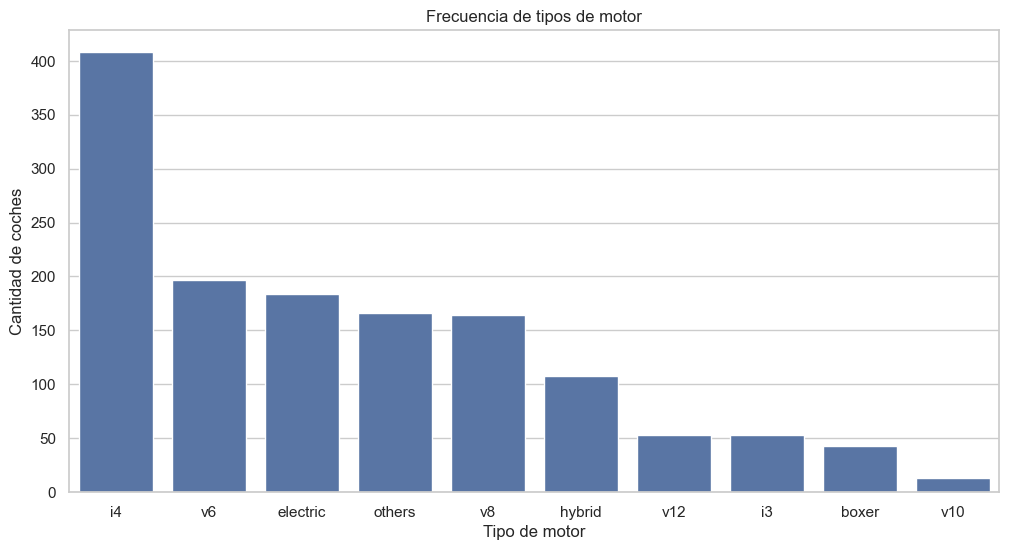

In [115]:
sns.countplot(data=df, x="engine_type", order=df["engine_type"].value_counts().index)
plt.title("Frecuencia de tipos de motor")
plt.xlabel("Tipo de motor")
plt.ylabel("Cantidad de coches")
plt.show()

`Conclusiones`

- El tipo de motor más común es el I4 (inline-4)

    - Aparece más de 400 veces.

    - Tiene sentido: es el motor más usado en coches compactos, sedanes y SUVs moderados.

- Los motores V6 y eléctricos también tienen mucha presencia

- Tipos de motor menos frecuentes

    - V12, I3, boxer, y especialmente V10 son poco comunes.



#### ¿Qué tipo de combustible es el más usado?

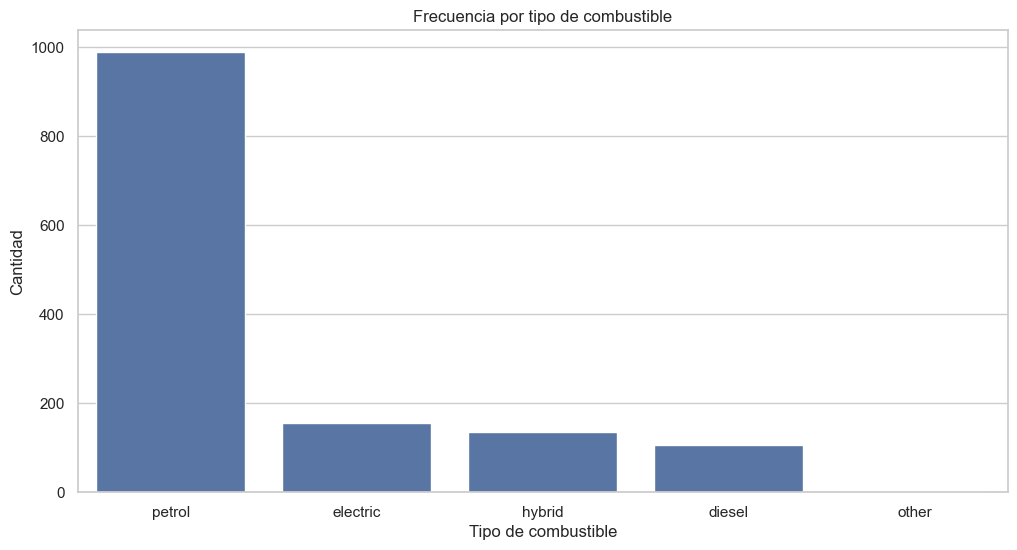

In [ ]:
sns.countplot(data=df, x="fuel_type", order=df["fuel_type"].value_counts().index)
plt.title("Frecuencia por tipo de combustible")
plt.xlabel("Tipo de combustible")
plt.ylabel("Cantidad")
plt.show()

`Conclusiones`

El combustible más utilizado en el dataset es gasolina (petrol). Esto es lógico, ya que la mayoría de los vehículos incluidos pertenecen a gamas medias y altas, donde es habitual encontrar motores de gasolina debido a su mejor rendimiento.

#### ¿Cuáles son las marcas que fabrican más coches híbridos?

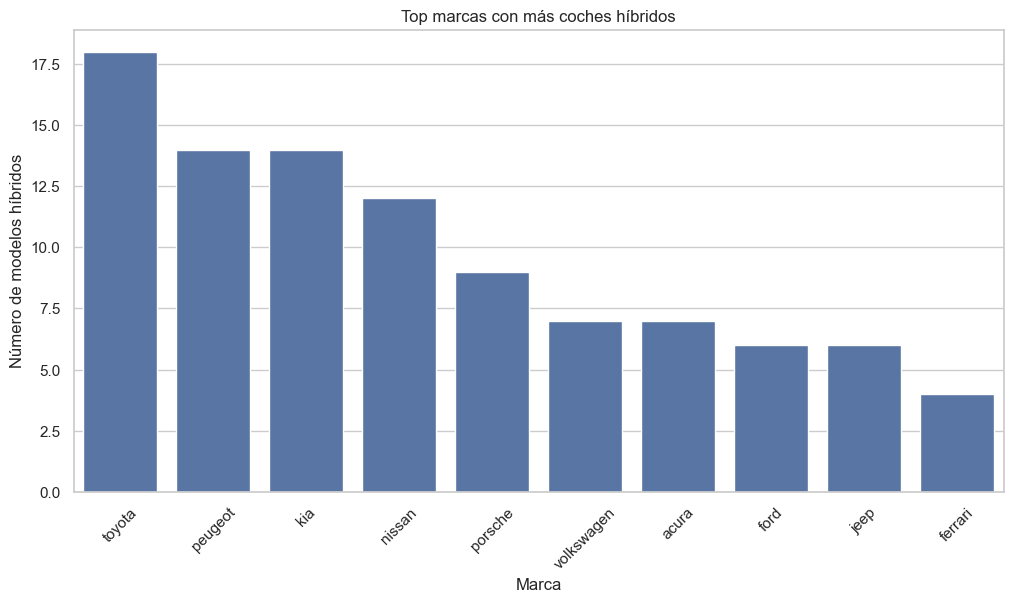

In [117]:
hybrid_df = df[df["fuel_type"] == "hybrid"]

sns.countplot(data=hybrid_df, x="company_name", order=hybrid_df["company_name"].value_counts().head(10).index)
plt.title("Top marcas con más coches híbridos")
plt.xlabel("Marca")
plt.ylabel("Número de modelos híbridos")
plt.xticks(rotation=45)
plt.show()


`Conclusiones`

- Toyota es la marca con más coches híbridos del dataset, destacando claramente sobre el resto.

- Peugeot y Kia también tienen una presencia importante en modelos híbridos.

- Marcas como Nissan, Porsche y Volkswagen aparecen en un nivel intermedio.

- Ford, Jeep y especialmente Ferrari tienen muy pocos modelos híbridos, lo cual es lógico por el tipo de vehículos que producen.

#### ¿Qué fabricantes tienen más modelos por encima de 500 CV?

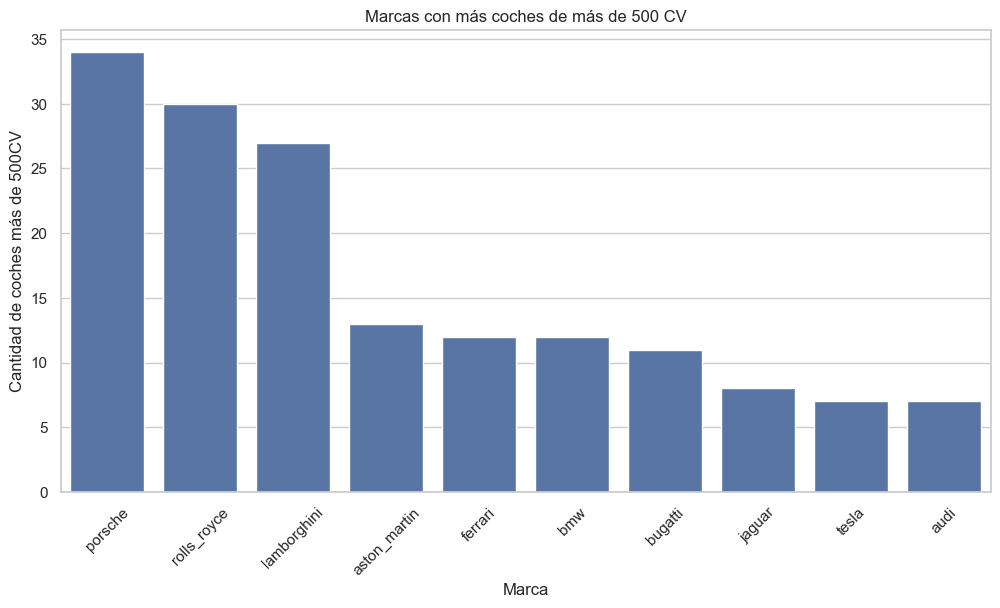

In [118]:
high_power_df = df[df["horse_power"] > 500]

sns.countplot(data=high_power_df, x="company_name",
              order=high_power_df["company_name"].value_counts().head(10).index)
plt.title("Marcas con más coches de más de 500 CV")
plt.xlabel("Marca")
plt.ylabel("Cantidad de coches más de 500CV")
plt.xticks(rotation=45)
plt.show()

`Conclusiones`

- Porsche es la marca con más coches de más de 500 CV, destacándose claramente sobre todas las demás.

- Rolls-Royce y Lamborghini también tienen una alta cantidad de modelos muy potentes.

- Aston Martin, Ferrari, BMW y Bugatti se sitúan en un nivel intermedio.

- Jaguar, Tesla y Audi también aparecen, pero con menos modelos por encima de 500 CV.

Aunque estas cifras reflejan lo que aparece en las gráficas, es importante tener en cuenta que están basadas únicamente en el dataset utilizado. En la realidad, marcas como Bugatti, cuyos modelos superan con facilidad los 1000 CV, deberían aparecer los primeros.

Sin embargo, si en el dataset solo hay registradas unas pocas unidades o si no están incluidos todos sus modelos, la representación visual puede no reflejar la proporción real de la marca en el mercado.

#### ¿Qué marcas producen coches con mayor torque medio?

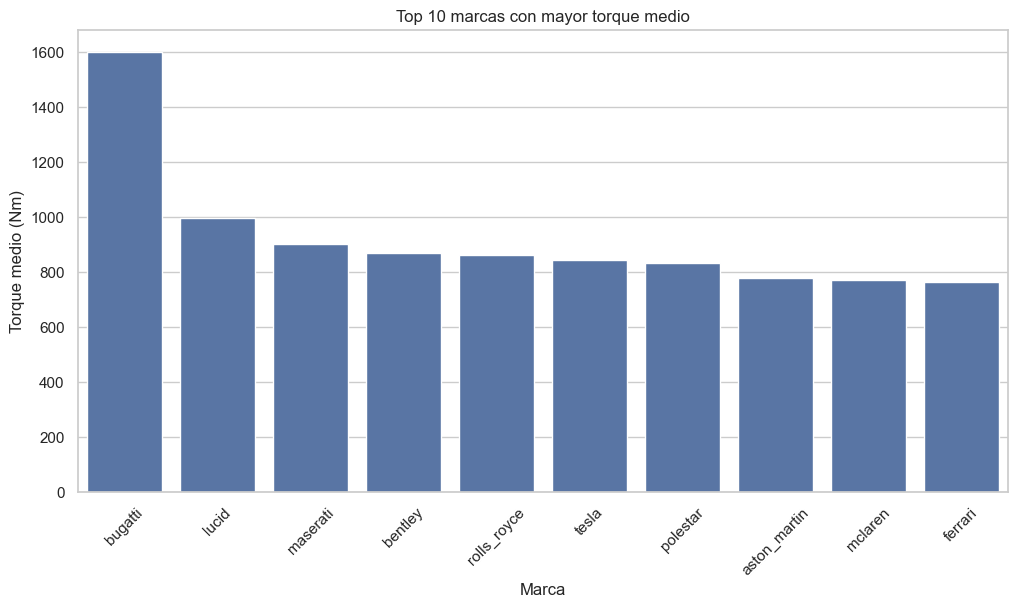

In [119]:
top10_torque = (
    df.groupby("company_name")["torque_nm"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=top10_torque.index, y=top10_torque.values)
plt.title("Top 10 marcas con mayor torque medio")
plt.xlabel("Marca")
plt.ylabel("Torque medio (Nm)")
plt.xticks(rotation=45)
plt.show()


`Conclusiones`

- Bugatti destaca de forma contundente como la marca con mayor torque medio, superando los 1600 Nm.

- Lucid, Maserati, Bentley y Rolls-Royce también presentan valores muy altos de torque medio.

Podemos ver que Ferrari aparece en la parte baja del Top 10, esto se debe a que como bien he dicho antes el análisis se realiza en base a mi dataset.

#### ¿Cómo se distribuyen los precios de los coches en el dataset?

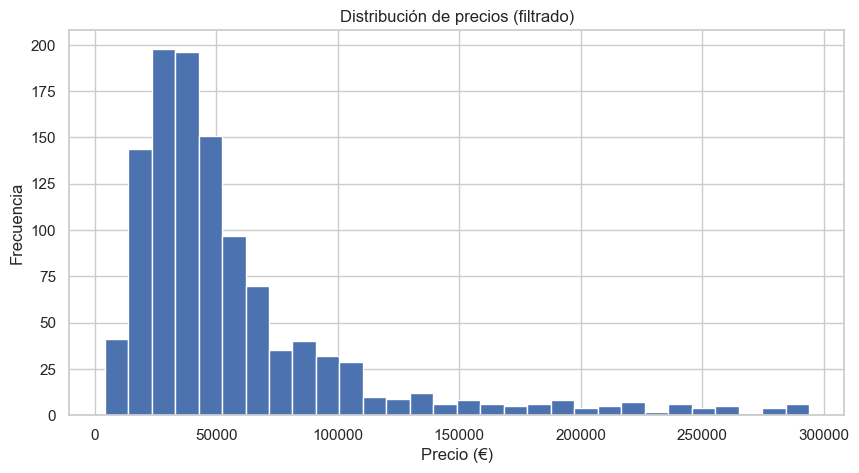

In [121]:
filtered = df[df["price"] < 300000]  # Quito los coches más caros ya que sino aplasta el resto de coches.

plt.figure(figsize=(10,5))
plt.hist(filtered["price"].dropna(), bins=30)
plt.title("Distribución de precios (filtrado)")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.show()

`Conclusiones`

- La mayoría de coches del dataset se concentran en un rango de precios entre 20.000 € y 60.000 €.

- A partir de 100.000 € la frecuencia empieza a disminuir notablemente, ya son coches de lujo.

Se ha filtrado el precio a menos de 300.000 € porque en el dataset hay coches extremadamente caros.
Sin este filtro, los valores millonarios aplastaban al resto y la distribución no se veía correctamente.

#### ¿Cómo evoluciona la velocidad máxima según la potencia (CV)?

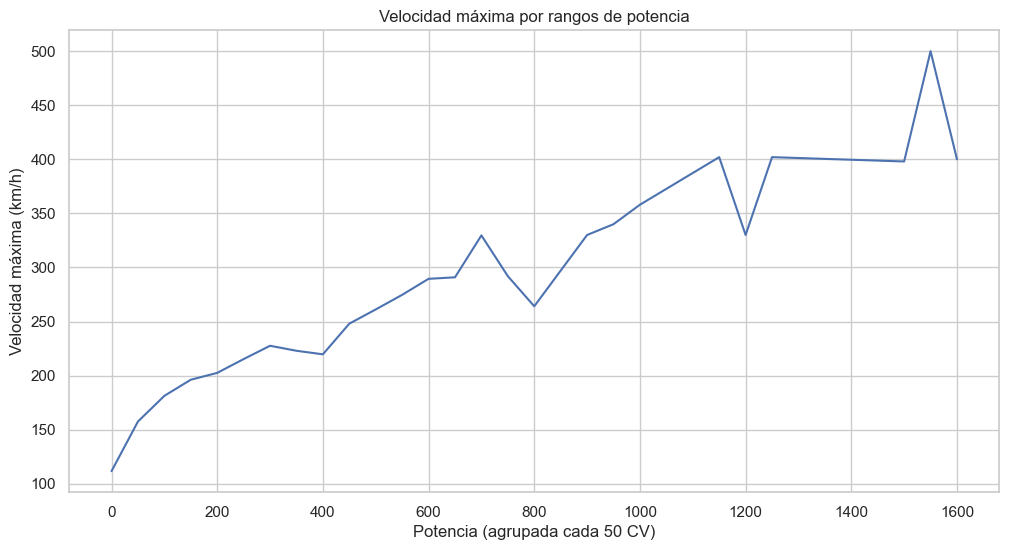

In [122]:
# Me quedo solo con potencia y velocidad máxima y elimino filas que tengan valores nulos
df_line = df[["horse_power", "top_speed"]].dropna()

# Agrupo la potencia en bloques de 50 CV
df_line["hp_group"] = (df_line["horse_power"] // 50) * 50

# Calculo la velocidad media dentro de cada bloque de potencia
df_group = df_line.groupby("hp_group")["top_speed"].mean().reset_index()

sns.lineplot(data=df_group, x="hp_group", y="top_speed")
plt.title("Velocidad máxima por rangos de potencia")
plt.xlabel("Potencia (agrupada cada 50 CV)")
plt.ylabel("Velocidad máxima (km/h)")
plt.show()

`Conclusiones`

Podemos observar que a más potencia mayor velocidad máxima

#### ¿Existe relación entre el torque (Nm) y la potencia (CV)?

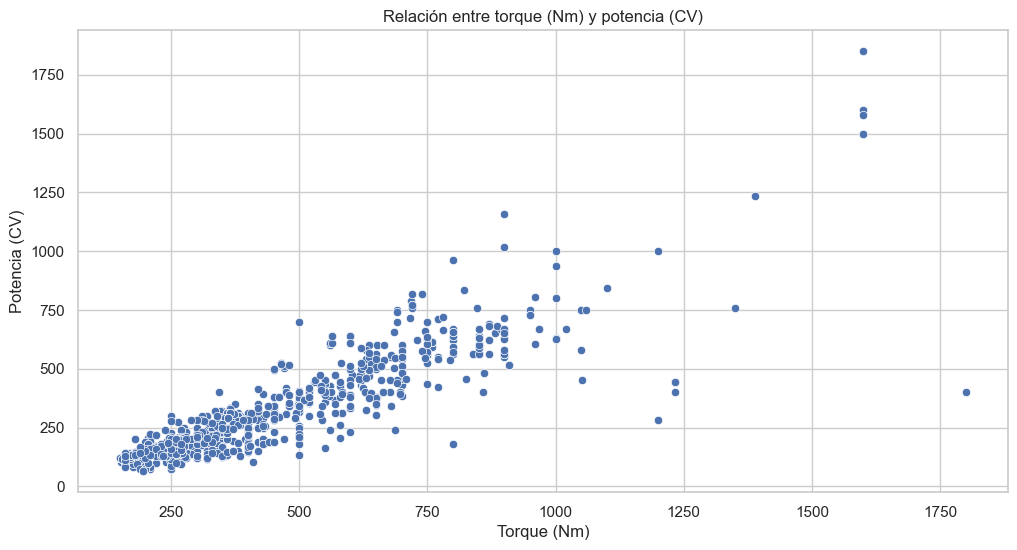

In [134]:
sns.scatterplot(data=df, x="torque_nm", y="horse_power")

plt.title("Relación entre torque (Nm) y potencia (CV)")
plt.xlabel("Torque (Nm)")
plt.ylabel("Potencia (CV)")
plt.show()

`Conclusiones`

En el gráfico podemos observar una relación positiva entre el torque y la potencia.
A medida que aumenta el torque del motor, también aumenta la potencia del vehículo.
La mayoría de coches se agrupan en la zona de 200–800 Nm y 100–600 CV, mientras que solo algunos modelos muy potentes presentan valores mucho más altos, funcionando como outliers.

#### ¿Cuáles son los modelos más potentes de cada marca?

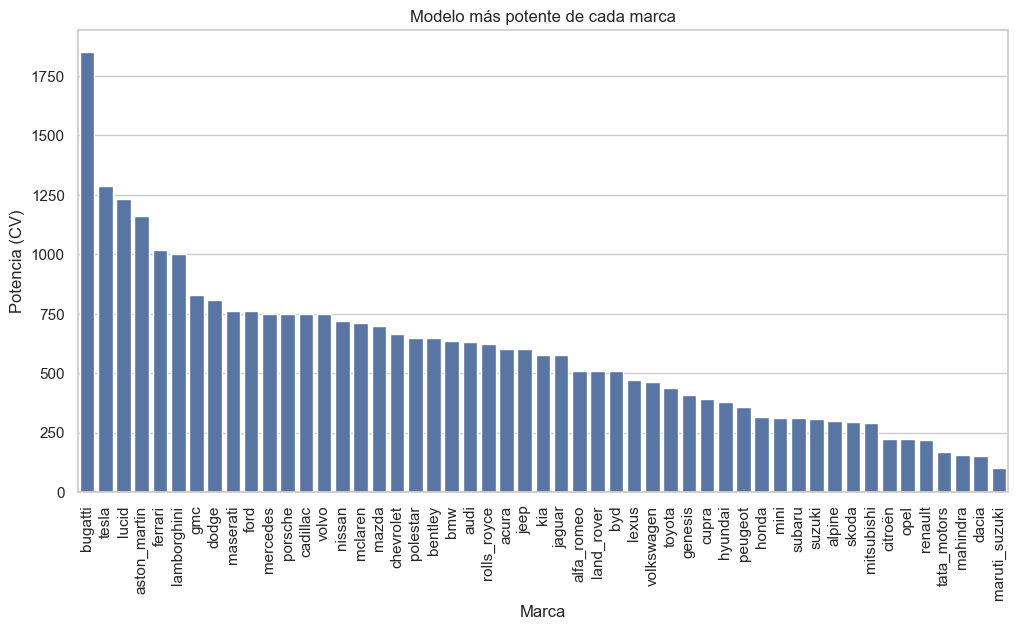

In [124]:
max_power = df.sort_values("horse_power", ascending=False).drop_duplicates("company_name")

sns.barplot(
    data=max_power,
    x="company_name",
    y="horse_power",
    ci=None
)

plt.title("Modelo más potente de cada marca")
plt.xlabel("Marca")
plt.ylabel("Potencia (CV)")
plt.xticks(rotation=90)
plt.show()


`Conclusiones`

Podemos ver los coches con más potencia que hay.

- En el primer lugar con diferencia tenemos al bugatti.

- También me sorprende que en la segunda posición esté el tesla.

- Marcas más comunes son las que ocupan las posiciones más bajas

#### ¿Cómo se distribuyen los caballos de potencia (CV) en el dataset?

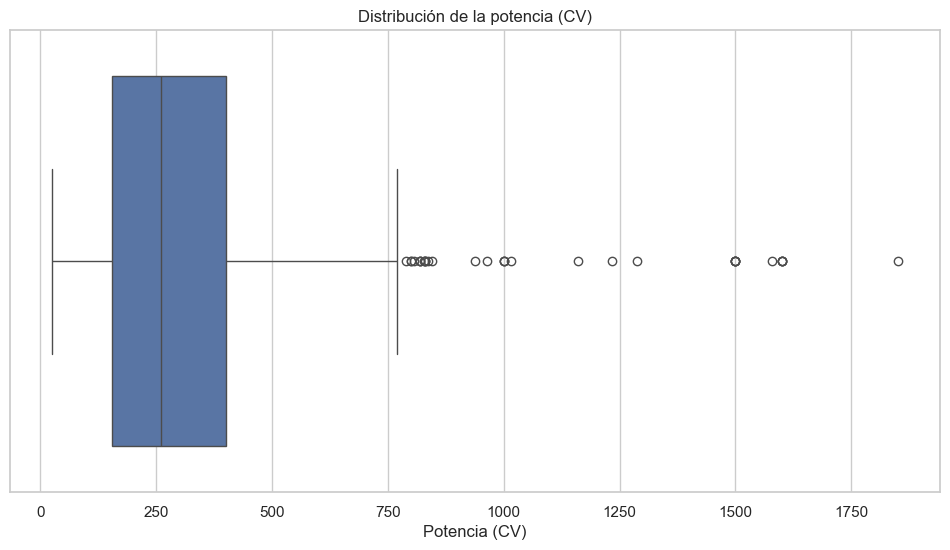

In [ ]:
sns.boxplot(data=df,x="horse_power")

plt.title("Distribución de la potencia (CV)")
plt.xlabel("Potencia (CV)")
plt.show()

`Conclusiones`

La mayoría de coches del dataset tienen entre 150 y 400 CV, que es un rango típico de vehículos de gama media y media-alta.

Sin embargo, también se observan varios outliers con potencias muy altas

#### Tiempo que tardan los coches en hacer el 0–100 km/h

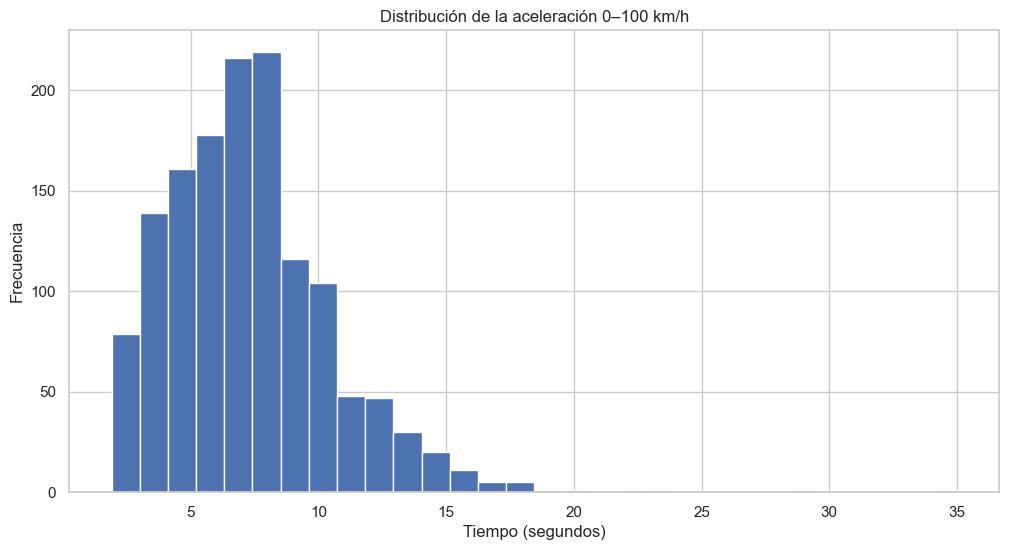

In [133]:

plt.hist(df["acceleration_0_100"].dropna(), bins=30)

plt.title("Distribución de la aceleración 0–100 km/h")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Frecuencia")
plt.show()


`Conclusiones`

- La mayor parte de los coches acelera de 5 a 8 segundos, lo cual es típico de vehículos de gama media y media-alta.

- También aparecen coches muy rápidos (3–4 s) y otros mucho más lentos (más de 12 s), pero son minoría.


### 3.Conclusión tras realizar la visualización

Tras realizar el análisis visual del dataset, se ha podido obtener una comprensión mucho más profunda y clara de cómo se comportan las variables y cómo se relacionan.

- Distribuciones de variables numéricas

    - Los histogramas mostraron que la potencia, la velocidad máxima, el torque, el precio y la aceleración 0–100 km/h siguen valores lógicos dentro sector automotriz.
    - Se observó que muchos valores se agrupan en rangos típicos de coches de gama media-alta, mientras que los extremos (superdeportivos o coches muy lentos/baratos) aparecen como minoría.

- Comparación entre marcas

    - Los countplots demostraron qué marcas están más representadas, destacando Nissa, Volkswagen y Porsche como las más frecuentes.
    - Las visualizaciones también revelaron qué marcas sobresalen en mercados específicos:

        - Toyota, Peugeot y Kia en híbridos.
        - Porsche, Rolls-Royce, Lamborghini y Bugatti en altas potencias.
        - Bugatti dominando en torque y velocidad máxima.

- Motores y combustibles

    - El mayor tipo de motor que hay es i4, v6 y eléctricos, mientras que motores como v12 o v10 aparecen en cantidades muy bajas.

- Relaciones entre variables

    - Mayor torque → mayor potencia → mayor velocidad máxima

- Rendimiento y características

    - Los boxplots mostraron la presencia de coches extremadamente potentes, rápidos o con mucho torque, lo cual se reflejó en forma de outliers.
    - La mayoría de vehículos se sitúa en rangos razonables:

        - 150–400 CV de potencia
        - 5–8 segundos en el 0–100 km/h
